In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


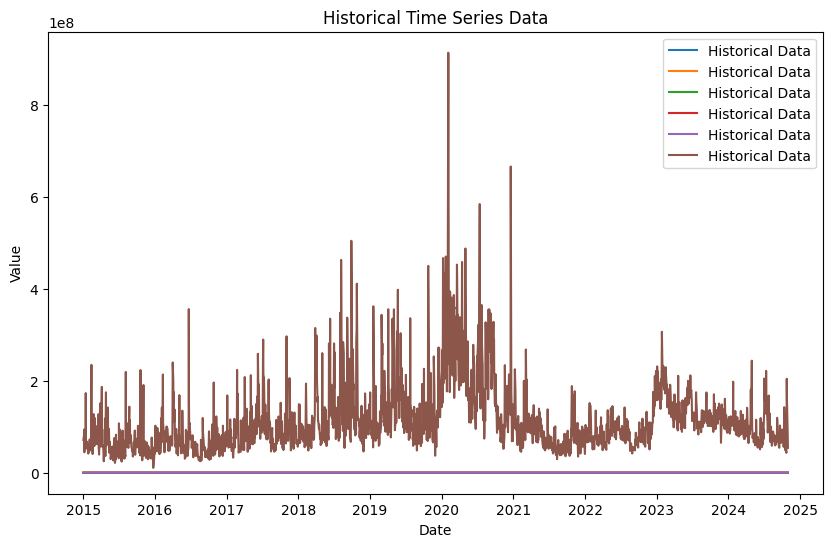

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load historical data
data = pd.read_csv('./financial_data/Tsla.csv', parse_dates=['Date'], index_col='Date')

# Prepare data for visualization
plt.figure(figsize=(10, 6))
plt.plot(data, label='Historical Data')
plt.title('Historical Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [15]:
data

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600


In [20]:
data =data.reset_index()
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...,...
2469,2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
2470,2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2471,2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600
2472,2024-10-29 00:00:00+00:00,259.519989,259.519989,264.980011,255.509995,264.510010,80521800


In [21]:
# Ensure the datetime format is correct
data['Date'] = pd.to_datetime(data['Date'])

In [22]:
# Function to create sequences for LSTM input
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step, 0])  # Input feature sequence
        y.append(data[i+time_step, 0])    # Target value (next value)
    return np.array(X), np.array(y)

In [23]:
# Preprocess the data
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']].values)

In [24]:
# Split the data into training and test sets (80% for training, 20% for testing)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [25]:
# Create sequences for LSTM
time_step = 60  # Use 60 previous days to predict the next day's stock price
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

In [26]:
# Reshape the data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer, predicting the stock price

d:\10 A KAI 2\week11\Time_Series_Forecasting_for_Portfolio_Management\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0293 - val_loss: 0.0026
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 9.0941e-04 - val_loss: 0.0017
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 9.0671e-04 - val_loss: 0.0019
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 8.3521e-04 - val_loss: 0.0013
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.0090e-04 - val_loss: 0.0023
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 7.4912e-04 - val_loss: 0.0012
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 6.3746e-04 - val_loss: 0.0011
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 6.3512e-04 - val_loss: 0.0011
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.0665e-04 - val_loss: 9.5030e-04


In [30]:
# Predict on the test set
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [31]:
# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

In [32]:
# Inverse transform the actual test data
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

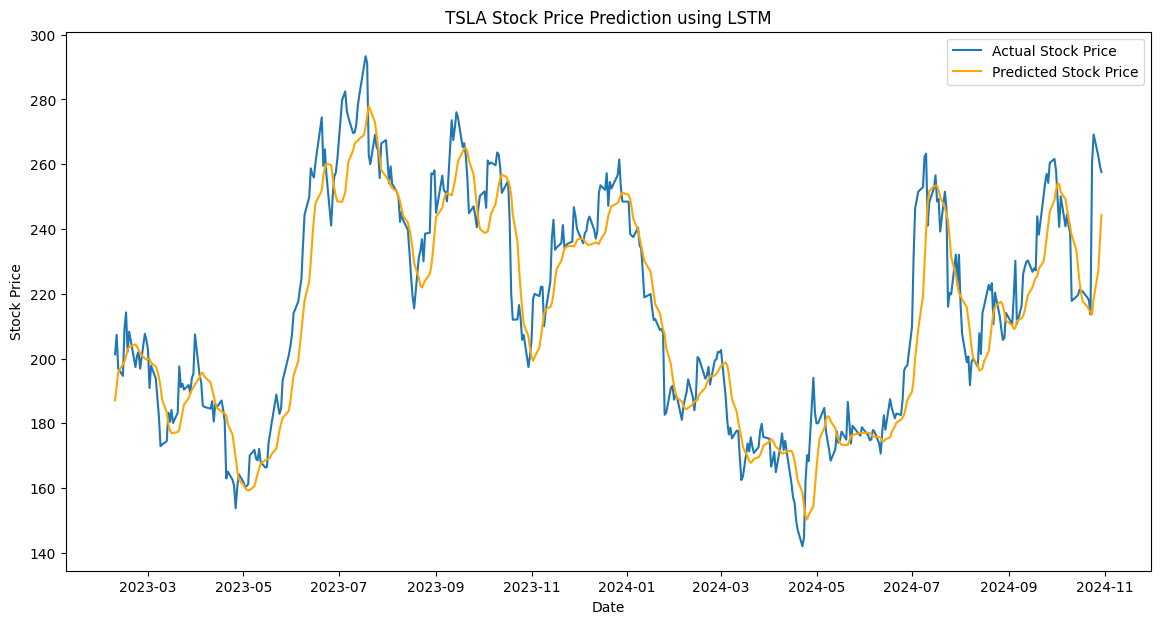

In [34]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][train_size + time_step:], y_test_actual, label="Actual Stock Price")
plt.plot(data['Date'][train_size + time_step:], predictions, label="Predicted Stock Price", color='orange')
plt.title(f"TSLA Stock Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [35]:
# Extract trend from predictions
trend = predictions.flatten()
trend_diff = np.diff(trend)

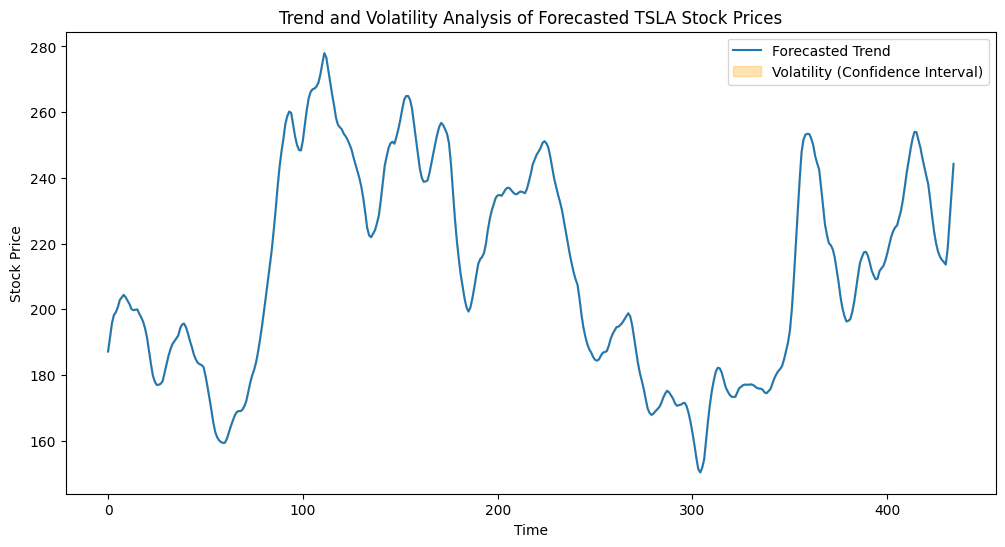

In [36]:
# Plot trend and volatility
plt.figure(figsize=(12, 6))
plt.plot(trend, label="Forecasted Trend")
plt.fill_between(range(len(trend)), trend - 0.1, trend + 0.1, color='orange', alpha=0.3, label="Volatility (Confidence Interval)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Trend and Volatility Analysis of Forecasted TSLA Stock Prices")
plt.legend()
plt.show()

In [37]:
# Summary of trend volatility
volatility = trend_diff.std()
print(f"Forecasted Trend Volatility: {volatility}")

Forecasted Trend Volatility: 2.8913772106170654


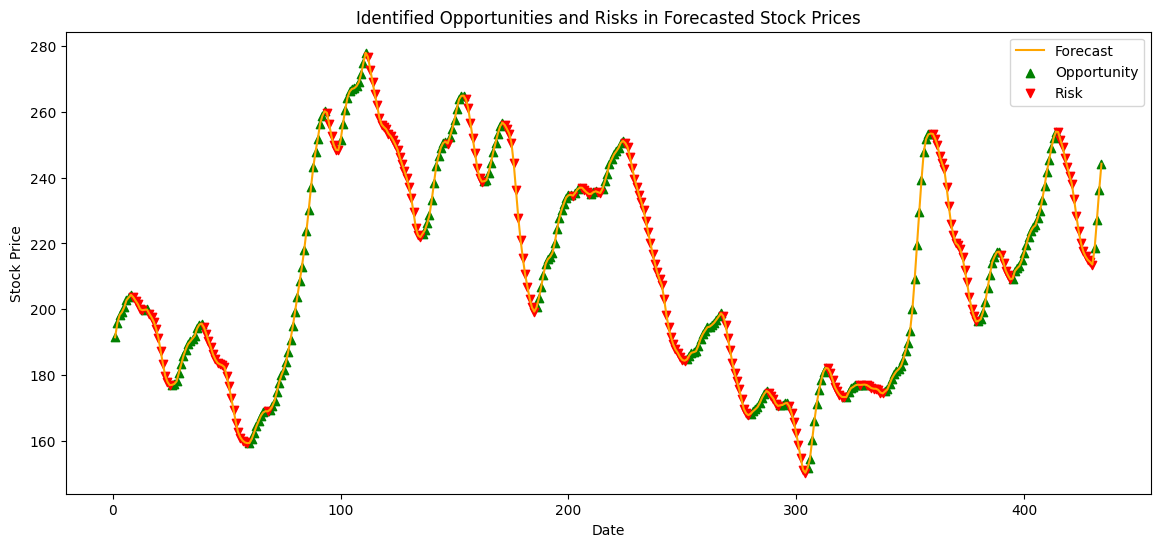

Potential Opportunity Periods:
1      191.480026
2      195.772034
3      198.250793
4      199.117126
5      200.599609
          ...    
414    254.017044
431    218.499176
432    227.119858
433    236.218689
434    244.244827
Length: 228, dtype: float32

Potential Risk Periods:
9      203.651642
10     202.588562
11     201.551804
12     200.035583
13     199.706223
          ...    
426    217.639694
427    216.046066
428    215.016113
429    214.388245
430    213.593414
Length: 206, dtype: float32


In [43]:
# Ensure trend is a pandas Series (if it's not already)
trend = pd.Series(trend)

# Calculate the difference in trend (ignoring the first NaN value)
trend_diff = trend.diff().dropna()  # Drop the NaN value in the first row of trend_diff

# Re-align trend to match the length of trend_diff (drop the first row of trend)
trend = trend.iloc[1:]

# Identify opportunities (upward trend) and risks (downward trend or high volatility)
opportunity_periods = trend[trend_diff > 0]  # periods where trend is increasing
risk_periods = trend[trend_diff < 0]  # periods where trend is decreasing

# Plot opportunities and risks
plt.figure(figsize=(14, 6))
plt.plot(trend.index, trend, label="Forecast", color='orange')
plt.scatter(opportunity_periods.index, opportunity_periods, color='green', label="Opportunity", marker='^')
plt.scatter(risk_periods.index, risk_periods, color='red', label="Risk", marker='v')
plt.title("Identified Opportunities and Risks in Forecasted Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Print the identified opportunity and risk periods
print(f"Potential Opportunity Periods:\n{opportunity_periods}")
print(f"\nPotential Risk Periods:\n{risk_periods}")

NameError: name 'opportunity_periods' is not defined

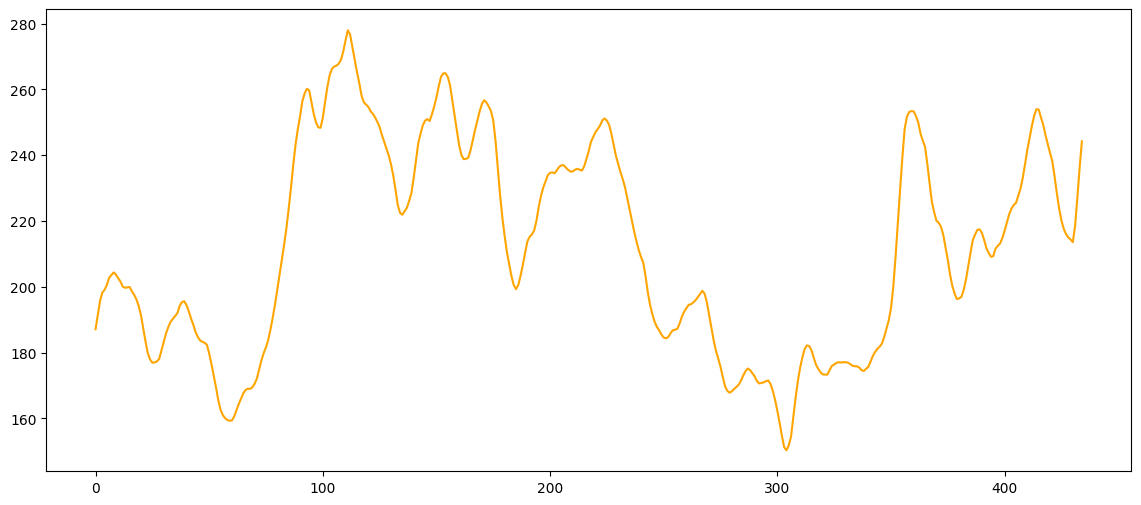

In [39]:
# Plot opportunities and risks
plt.figure(figsize=(14, 6))
plt.plot(range(len(predictions)), predictions, label="Forecast", color='orange')
plt.scatter(range(len(opportunity_periods)), opportunity_periods, color='green', label="Opportunity", marker='^')
plt.scatter(range(len(risk_periods)), risk_periods, color='red', label="Risk", marker='v')
plt.title("Identified Opportunities and Risks in Forecasted TSLA Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [40]:
# Print the identified opportunity and risk periods
print(f"Potential Opportunity Periods:\n{opportunity_periods}")
print(f"\nPotential Risk Periods:\n{risk_periods}")

NameError: name 'opportunity_periods' is not defined